In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

In [102]:
from proj1_helpers import *
from toolbox import *
DATA_TRAIN_PATH = 'train.csv' # TODO: download train data and supply path here 
init_y, init_x, ids = load_csv_data(DATA_TRAIN_PATH, sub_sample=True)
init_y = (init_y + 1.0) * 0.5

num_samples = x.shape[0]

In [112]:
def cropped_of_rows_with_999_value(x, y):
    for i in range(x.shape[1]):
        idxes = (x[:, i] != -999)
        x = x[idxes]
        y = y[idxes]
    return x, y

def columns_with_999_value(x):
    indexes = []
    for i in range(x.shape[1]):
        if np.any(x[:, i] == -999.0):
            indexes.append(i)
    return indexes

def cropped_of_columns(x, columns_indexes):
    return np.delete(x, columns_indexes, axis = 1)

def augment(x, n):
    return x if n == 1 else np.append(augment(x, n - 1), x ** n, axis = 1)

In [111]:
rem_indexes = columns_with_999_value(init_x)
x = cropped_of_columns(init_x, )
#x, y = cropped_of_rows_with_999_value(init_x, init_y)
x = augment(x, 4)
tx, mean, var = standardize(x)

print(tx.shape)

[0, 4, 5, 6, 12, 23, 24, 25, 26, 27, 28]
(1369, 121)


## Do your thing crazy machine learning thing here :) ...

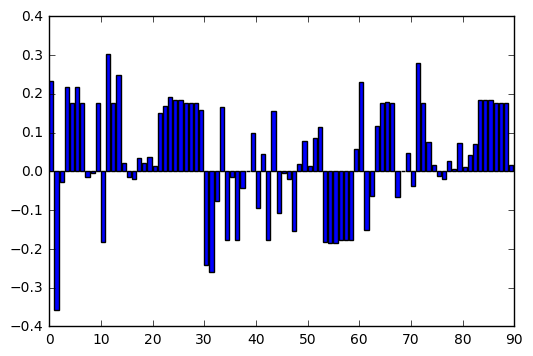

In [73]:
def plot_feature_to_output_correlations(tx, y):
    feature_count = tx.shape[1]

    corrs = np.zeros(feature_count)
    for i in range(feature_count):
        x = tx[:, i]
        corrs[i] = np.corrcoef(x, y)[0][1]

    fig, ax = plt.subplots()
    width = 0.5

    ax.bar(np.arange(feature_count), corrs)

plot_feature_to_output_correlations(nx, y)

In [81]:
loss, w = logistic_regression(y, tx, np.zeros(tx.shape[1]), 0.05, 300)
y_pred = logistfun(tx @ w)

y_pred[np.where(y_pred <  0.5)] = 0
y_pred[np.where(y_pred >= 0.5)] = 1

np.count_nonzero(y_pred == y) / len(y)

0.7647918188458729

## Generate predictions and save ouput in csv format for submission:

In [ ]:
DATA_TEST_PATH = '' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [ ]:
OUTPUT_PATH = '' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)